<a href="https://www.kaggle.com/code/patimejia/solutions-tests-fastai-02-production?scriptVersionId=118914108" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Install or Update Fastai and DuckDuckGo Versions

In [1]:
!python -m pip list | grep fast

fastai                                2.7.10
fastapi                               0.89.1
fastavro                              1.5.2
fastcore                              1.5.27
fastdownload                          0.0.7
fasteners                             0.17.3
fastjsonschema                        2.15.3
fastprogress                          1.0.3
fasttext                              0.9.2
pyfasttext                            0.4.6


check for duck duck go

In [2]:
!python -m pip list | grep 'du\|dd'

giddy                                 2.3.3
google-cloud-scheduler                2.6.4
mdurl                                 0.1.0
pyasn1-modules                        0.2.7
pydub                                 0.25.1
sklearn-contrib-py-earth              0.1.0+1.gdde5f89
tensorflow-addons                     0.14.0


Therefore, there is no installation of `duckduckgo` or any library with `du` or `dd` in its filename.

Install `duckduckgo_search` with `pip`:

In [3]:
!pip install -Uqq duckduckgo_search fastai


- `pip` is a recursive acronym that can stand for either "Pip Installs Packages" or "Pip Installs Python".
- `pip` is a command line tool for installing and managing Python packages, otherwise known as modules or libraries. Non-Python packages can also be installed using `pip` such as Java, C, C++, and Fortran libraries.
- `install` is a subcommand of `pip` that installs packages.
- `-U` is an option of `pip install` that upgrades the package to the latest version.
- `-qq` is an option of `pip install` that suppresses the output of the command.
- `duckduckgo_search` is the name of the package to install. It is a Python wrapper for the DuckDuckGo search engine and is available on PyPI. 
- `duckduckgo_search` is a dependency of `fastai` and is not installed by default.
- [documentation](https://pypi.org/project/duckduckgo-search/#3-ddg_images---image-search-by-duckduckgocom) for `duckduckgo_search`


In [4]:
!python -m pip list | grep 'du\|dd\|fast'

duckduckgo-search                     2.8.0
fastai                                2.7.10
fastapi                               0.89.1
fastavro                              1.5.2
fastcore                              1.5.27
fastdownload                          0.0.7
fasteners                             0.17.3
fastjsonschema                        2.15.3
fastprogress                          1.0.3
fasttext                              0.9.2
giddy                                 2.3.3
google-cloud-scheduler                2.6.4
mdurl                                 0.1.0
pyasn1-modules                        0.2.7
pydub                                 0.25.1
pyfasttext                            0.4.6
sklearn-contrib-py-earth              0.1.0+1.gdde5f89
tensorflow-addons                     0.14.0


shows `duckduckgo-search` verision 2.8.0 has been installed and `fastai` latest version

# 🧪 Test: Installation and Import Process

In [5]:
def test_imports():
    try:
        import fastai
        import duckduckgo_search
        import fastdownload
    except ImportError as e:
        print(f'Import failed: {e}')
        return

    print(f'fastai version: {fastai.__version__}')
    print(f'duckduckgo_search version: {duckduckgo_search.__version__}')
    print(f'fastdownload version: {fastdownload.__version__}')
    print('Success! All import calls were successful.')


test_imports()

fastai version: 2.7.10
duckduckgo_search version: 2.8.0
fastdownload version: 0.0.7
Success! All import calls were successful.


# Collecting Data
# 👋 Hello Image Search

In [6]:
from duckduckgo_search import ddg_images
from fastai.vision.all import *


def search_image_urls(term:str, max_images:int, min_sz:int)->List:
    print(f"Searching for {term} images with a minimum size of {min_sz}x{min_sz} pixels and a maximum of {max_images} images.")
    results = ddg_images(term, max_results=max_images)
    images = [result.get('image') for result in results if result.get('width')>min_sz and result.get('height')>min_sz]
    return L(images).unique().sorted()

- The code imports the `ddg_images` function from the `duckduckgo_search"`library and the `L` function and everything else from the `fastai.vision.all` module.
- A function `search_image_urls` is defined that takes in three arguments:
    - `term`: a string representing the search term.
    - `max_images`: the maximum number of images to be returned.
    - `min_sz`: the minimum size of images to be returned.
- The code prints a message indicating that it is searching for images using the search term.
- The `ddg_images` function is called with the search term and the maximum number of images to be returned, and the result is stored in the `results` variable.
- A list comprehension is used to filter the `results` to only include images that have a width and height greater than the `min_sz` value. The filtered images are stored in the `images` variable.
- The code creates a fastai.core.List object using the `L` function and applies the `unique()` and `sorted()` methods to it to remove duplicate URLs and sort the list, respectively.
- The result is returned as the output of the function.

In [7]:
term = 'Umbelliferae seeds'
min_sz=128
max_images=150 

url_list = search_image_urls(term, max_images, min_sz) 

Searching for Umbelliferae seeds images with a minimum size of 128x128 pixels and a maximum of 150 images.


# 🧪 Test: Image Search Function

In [8]:
def test_search_image_urls(url_list, number_of_results_to_print): 
    try:
        url_list = search_image_urls(term, max_images, min_sz)
    except Exception as e:
        print(f'Test failed: {e}')
        return

    print(f'Number of images found: {len(url_list)}')
    print(f'Number of duplicates: {len(url_list)-len(url_list.unique())}')
    print(f'Number of images dropped due to size: {max_images-len(url_list)}')
    print(f'Number of images kept: {len(url_list)}')
    print(f'Number of images to print: {number_of_results_to_print}')
    print('Success! The search_image_urls function works as expected.')
    print(f'Here are some sample urls: {url_list[:number_of_results_to_print]}')

In [9]:
test_search_image_urls(url_list,3)

Searching for Umbelliferae seeds images with a minimum size of 128x128 pixels and a maximum of 150 images.
Number of images found: 149
Number of duplicates: 0
Number of images dropped due to size: 1
Number of images kept: 149
Number of images to print: 3
Success! The search_image_urls function works as expected.
Here are some sample urls: ['http://2.bp.blogspot.com/-E2ElRb0KWvg/UOZKbjOgvsI/AAAAAAAAACs/fr7Agrbpy-s/s1600/352-angelica_archangelica.jpg', 'http://biology4isc.weebly.com/uploads/9/0/8/0/9080078/948054241.gif?467', 'http://castle.eiu.edu/prairie/images/periamer.fruits2.jpg']


# 🧪 Test: Image Download and Save
Testing the process of downloading a single image from a URL, saving it to a path, and opening it

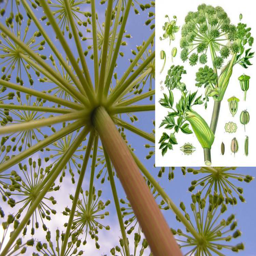

In [10]:
from fastdownload import download_url

dest = 'tests/test_image.jpg'
download_url(url_list[0], dest, show_progress=true)

im = Image.open(dest)
im = im.resize((256, 256))
im.save(dest)
im

- Set image destination path `dest`
- Download first URL in `url_list` to `dest` with progress shown
- Open `dest` using `Image.open` method from the `PIL` library (Python Imaging Library).
- Resize to 256x256 with `resize` method
- Overwrite original with resized image and save to `dest`
- Display the resized image, `im`

In [11]:
path = Path('tests')
fns = get_image_files(path)
fns

(#1) [Path('tests/test_image.jpg')]

- Define a Path object called `path` for the directory `tests`
- Get all image files within `tests` directory using `get_image_files`
- Store file paths in `fns`, a list of filenames
- Display the list of filenames, `fns`, in the `tests` folder

# Fetch Images with Fastai's download_images
Using fastai's download_images to fetch all the URLs for each search term and store them in individual folders

# 👋 Hello Search

In [12]:
seed_types = 'caraway seeds', 'ajwain seeds', 'fennel seeds', 'dill seeds', 'coriander' 
path = Path('seeds')

In [13]:
if not path.exists():
    path.mkdir()
for seed_type in seed_types:
    dest = (path/seed_type)
    dest.mkdir(exist_ok=True)
    results = search_image_urls(seed_type, 150, 128)
    download_images(dest, urls=results)


Searching for caraway seeds images with a minimum size of 128x128 pixels and a maximum of 150 images.
Searching for ajwain seeds images with a minimum size of 128x128 pixels and a maximum of 150 images.
Searching for fennel seeds images with a minimum size of 128x128 pixels and a maximum of 150 images.
Searching for dill seeds images with a minimum size of 128x128 pixels and a maximum of 150 images.
Searching for coriander images with a minimum size of 128x128 pixels and a maximum of 150 images.


- `if not path.exists()`: checks if a directory exists at the given path. If it does not exist, it creates the directory using `path.mkdir()`.
- The code then enters a for loop `for seed_type in seed_types`.
- `dest = (path/seed_type)` creates a new directory path by combining the path with the current`seed_type` in the loop.
- `dest.mkdir(exist_ok=True)` creates a directory at the `dest` path. The `exist_ok argument` is set to `True`, which means that if the directory already exists, it will not raise an error.
- `results = search_image_urls(seed_type, 150, 128)` retrieves a **list of image URLs** by calling the function `search_image_urls` with `seed_type`, `150`, and `128` as arguments.
- Finally, the code calls the function `download_images` with the **`dest` path** and the **`results`, list of image URLs**, as arguments, to download the images to the specified directory.

# 🧪 Test

In [14]:
fns = get_image_files(path)
fns


(#679) [Path('seeds/caraway seeds/838f173c-c32b-4d0a-b464-cd53d4a9264c.jpg'),Path('seeds/caraway seeds/c71aaf69-0545-409a-bbed-786f8bf8c48b.jpg'),Path('seeds/caraway seeds/de250f03-9fb8-4a5f-a435-42dc82d0ad0f.jpg'),Path('seeds/caraway seeds/a4340c42-0f93-4d59-a63e-ec0b88609683.jpg'),Path('seeds/caraway seeds/013592fa-0a53-4e95-98c9-909ad09b35ed.jpg'),Path('seeds/caraway seeds/83aa79cb-640a-45c3-85ee-d5835b4c1a8f.jpg'),Path('seeds/caraway seeds/6d473d8b-18f5-4a61-912d-044abc932893.jpg'),Path('seeds/caraway seeds/58a37f74-7e06-48c1-b4d5-623bd7334ba8.jpg'),Path('seeds/caraway seeds/443e78e6-56da-4cc7-aa7a-6035070ded3d.jpg'),Path('seeds/caraway seeds/b525bff2-eb95-4b2e-ad02-24206178a423.jpg')...]

- `fns = get_image_files(path)` calls the function `get_image_files` and passes the **`path`** as an argument. This function is expected to return a list of filenames of the image files located in the directory at the given path. The returned list of filenames is assigned to the variable `fns`.
- The last line of the code, `fns`, returns the value of the fns variable. This line serves no functional purpose. It is used for debugging or for testing. The result of this line would be the list of filenames that was assigned to the fns variable in the first line

In [15]:
len(fns)

679

- `len(fns)`:
    - Calculates the length of a collection object stored in the fns variable.
    - Returns an integer value representing the number of elements in the fns list.
    - Determines the number of filenames stored in the fns list.

In [16]:
for seed_type in seed_types:
    print(f'Start: number of {seed_type} images: {len(get_image_files(path/seed_type))}')
print(f'Start: total number of images: {sum([len(get_image_files(path/seed_type)) for seed_type in seed_types])}')


Start: number of caraway seeds images: 139
Start: number of ajwain seeds images: 137
Start: number of fennel seeds images: 134
Start: number of dill seeds images: 137
Start: number of coriander images: 132
Start: total number of images: 679


In [17]:
failed = verify_images(fns)
print(f'Number of images deleted: {len(failed)}')
failed


Number of images deleted: 12


(#12) [Path('seeds/caraway seeds/013592fa-0a53-4e95-98c9-909ad09b35ed.jpg'),Path('seeds/caraway seeds/1206e18e-44ee-4b4d-9b40-dfb96cbf78d7.jpg'),Path('seeds/fennel seeds/0309174b-2310-4016-9268-c5255b0d20b5.jpg'),Path('seeds/dill seeds/314f10ef-182c-4d8b-bd3a-cffae98ad4ef.jpg'),Path('seeds/dill seeds/c1b33635-cb07-40fa-95fe-796a731fa5ed.jpg'),Path('seeds/dill seeds/8474d662-0ba3-4803-b93d-4c6139f177dc.jpg'),Path('seeds/dill seeds/906abaaf-7251-4e94-a8ba-2bf346fc7c2a.jpg'),Path('seeds/coriander/4d8606a8-628b-4b86-82b9-b3e26129988e.jpg'),Path('seeds/coriander/523e5dff-43d0-45f4-b0f6-998644e5a780.jpg'),Path('seeds/coriander/e35c7871-2a61-4713-98d6-ef5c83a4b4a6.jpg')...]

- `failed` variable stores the result of `verify_images` function with **`fns`** as an argument.
- `verify_images` returns a list of images that failed to download or open correctly.
- The validation process is performed in parallel and the order of the list is not guaranteed to match the input list.
- The list may contain duplicates.
- The validation test is performed by opening the image with `PIL` and checking if the image is **not empty**.
- Empty image may indicate corruption, unsupported format (`gif`, `png` with **alpha channel**), or mismatched file extension.
- The validation test is not perfect but it is suitable for the purpose.

In [18]:
failed.map(Path.unlink);

- `failed.map(Path.unlink)` calls the `map` method on the failed variable, which is a list of filenames that failed the image verification test.
- The `map` method applies the `Path.unlink` function to each element of the list.
- `Path.unlink` is a method of the `Path` class from the `pathlib` module in Python, which deletes the file at the given path.
- Here, `Path.unlink` is used to delete each of the files in the failed list.
- The semicolon `;` at the end of the line is used to suppress the return value of the function.

In [19]:
for seed_type in seed_types:
    print(f'End: number of {seed_type} images: {len(get_image_files(path/seed_type))}')

print(f'Start number of images found: {len(fns)}')
print(f'End number of images: {sum([len(get_image_files(path/seed_type)) for seed_type in seed_types])}')
print(f'Number of images deleted: {len(failed)}')

End: number of caraway seeds images: 137
End: number of ajwain seeds images: 136
End: number of fennel seeds images: 133
End: number of dill seeds images: 133
End: number of coriander images: 128
Start number of images found: 679
End number of images: 667
Number of images deleted: 12


# 👋 Hello Data Loader

In [20]:
seeds = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

## Data augmentation: fractal vs. non-fractal

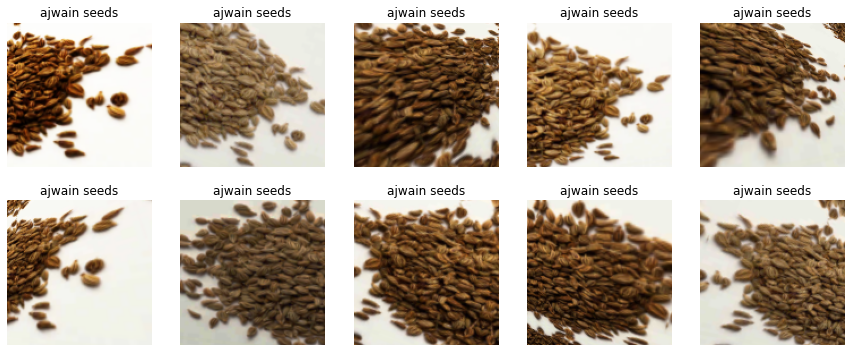

In [21]:
seeds = seeds.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = seeds.dataloaders(path, num_workers=0)
dls.train.show_batch(max_n=10, nrows=2, unique=True)

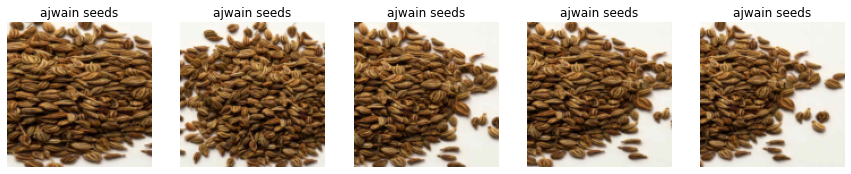

In [22]:
seeds = seeds.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = seeds.dataloaders(path, num_workers=0)
dls.train.show_batch(max_n=5, nrows=1, unique=True)

We selected `RandomResizedCrop` as it retains the geometric, symmetric and fractal features of seeds, making it ideal for analyzing natural patterns. Unlike the `aug_transforms` method, it doesn't alter the calculated fractals of nature. For non-fractal objects like ***teddy bears***, the `aug_transforms` method is a better option. The former method feels like observing a subject under a moving microscope, while the latter feels like inspecting a close-up item while walking.

# Train the model

# 👋 Hello Learner

> If you are encoutering the PIL alpha channel error or Image Palette warning, re-run the following code to fix it:
```python
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
```
>Then, continue running the remaining code cells in the notebook.

In [25]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

- The code `from PIL import ImageFile`; `ImageFile.LOAD_TRUNCATED_IMAGES = True` sets a flag in the Python Imaging Library (`PIL`) to load truncated image files.
- Truncated image files have missing data and can cause issues when trying to open or process them.
- Setting the `LOAD_TRUNCATED_IMAGES` flag to True tells `PIL` to load these truncated images and prevents the "PIL alpha channel error" from occurring.
- This error occurs because `PIL` is unable to process the alpha channel (*transparency* information) of truncated image files.
- By allowing `PIL` to load truncated images, the flag skips the alpha channel and any errors associated with it, allowing the rest of the code to run smoothly
- An alternative is to convert truncated images to another format using a for loop, preserving the data and dataset size but may still cause loss of quality or information. See [forum](https://forums.fast.ai/t/userwarning-palette-images/90388/2)

In [26]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.507035,1.257561,0.511278,00:51


epoch,train_loss,valid_loss,error_rate,time
0,1.575467,1.104694,0.443609,00:52
1,1.438838,0.902461,0.390977,00:52
2,1.246225,0.861662,0.345865,00:52
3,1.108734,0.870189,0.338346,00:52


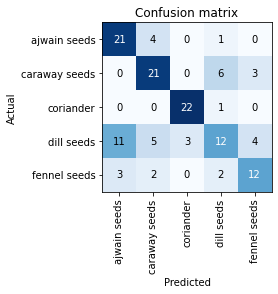

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

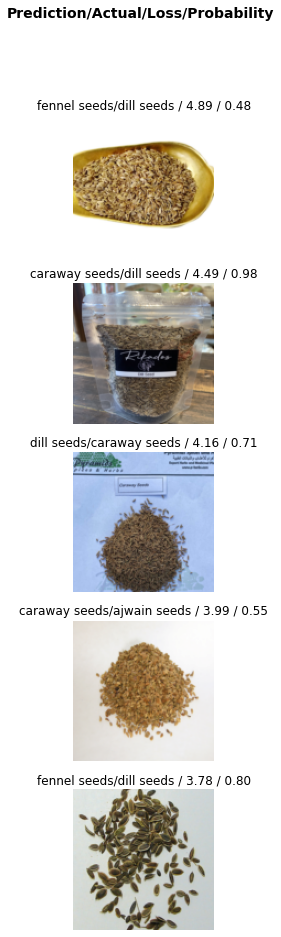

In [28]:
interp.plot_top_losses(5, nrows=5)


In [29]:
from fastai.vision.widgets import *

cleaner = ImageClassifierCleaner(learn)
print(f'Number of images before deleting: {len(cleaner.fns)}')

Number of images before deleting: 30


In [30]:
cleaner

In [31]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [47]:
learn.export()

In [48]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [49]:
learn_inf = load_learner(path/'export.pkl')

In [50]:
learn_inf.predict('tests/test_image.jpg')

('coriander',
 TensorBase(2),
 TensorBase([0.1013, 0.0501, 0.4462, 0.2322, 0.1702]))

In [51]:
learn_inf.dls.vocab

['ajwain seeds', 'caraway seeds', 'coriander', 'dill seeds', 'fennel seeds']

In [52]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [53]:
btn_upload = SimpleNamespace(data = ['tests/test_image.jpg'])

In [54]:
img = PILImage.create(btn_upload.data[-1])

In [55]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [56]:
pred,pred_idx,probs = learn_inf.predict(img)

In [57]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: coriander; Probability: 0.4462')

In [58]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [59]:
def on_click_classify(change):

    img = PILImage.create(btn_upload.data[-1])

    out_pl.clear_output()

    with out_pl: display(img.to_thumb(128,128))

    pred,pred_idx,probs = learn_inf.predict(img)

    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [60]:
btn_upload = widgets.FileUpload()

### Hello Seed Classifier

In [61]:
VBox([widgets.Label('Select your seed!'), btn_upload, btn_run, out_pl, lbl_pred])

## Questionnaire
1. Provide an example of where the bear classification model might work poorly in production, due to structural or style differences in the training data.
> R: The bear classification model might work poorly in production if the training data is from a different region than the production data. For example, if the training data is from the US, and the production data is from Europe, the model might not be able to classify bears correctly.
1. Where do text models currently have a major deficiency?
> R: Text models currently have a major deficiency in the area of grammar and syntax.
1. What are possible negative societal implications of text generation models?
> R: Text generation models could be used to generate fake news, which could have a negative impact on society.
1. In situations where a model might make mistakes, and those mistakes could be harmful, what is a good alternative to automating a process?
> R: A good alternative to automating a process is to have a human in the loop.
1. What kind of tabular data is deep learning particularly good at?
> R: Deep learning is particularly good at tabular data that has a lot of features.
1. What's a key downside of directly using a deep learning model for recommendation systems?
> R: A key downside of directly using a deep learning model for recommendation systems is that it can be difficult to explain why the model is making the recommendations it is making.
1. What are the steps of the Drivetrain Approach?
> R: The steps of the Drivetrain Approach are: 1) Create an image recognition model using data you curate, and deploy it on the web. 2) Use the model to collect more data. 3) Retrain the model using the new data. 4) Repeat steps 2 and 3 until the model is accurate enough.
1. How do the steps of the Drivetrain Approach map to a recommendation system?
> R: The steps of the Drivetrain Approach map to a recommendation system as follows: 1) Create a recommendation system using data you curate, and deploy it on the web. 2) Use the model to collect more data. 3) Retrain the model using the new data. 4) Repeat steps 2 and 3 until the model is accurate enough.
1. Create an image recognition model using data you curate, and deploy it on the web.
> R: done here
1. What is `DataLoaders`?
> R: `DataLoaders` is a class that contains the training and validation sets.
1. What four things do we need to tell fastai to create `DataLoaders`?
> R: We need to tell fastai to create `DataLoaders` by passing in the training and validation sets, the batch size, and the device.
1. What does the `splitter` parameter to `DataBlock` do?
> R: The `splitter` parameter to `DataBlock` tells fastai how to split the data into training and validation sets.
1. How do we ensure a random split always gives the same validation set?
> R: We ensure a random split always gives the same validation set by setting the `seed` parameter to `DataBlock`.
1. What letters are often used to signify the independent and dependent variables?
> R: The independent variable is often denoted by `x`, and the dependent variable is often denoted by `y`.
1. What's the difference between the crop, pad, and squish resize approaches? When might you choose one over the others?
> R: The crop resize approach crops the image to the desired size. The pad resize approach pads the image with black pixels to the desired size. The squish resize approach squishes the image to the desired size. You might choose one over the others depending on the type of image you are working with.
1. What is data augmentation? Why is it needed?
>R: Data augmentation is a technique that is used to increase the size of a dataset by applying random transformations to the images. It is needed because it helps prevent overfitting.
1. What is the difference between `item_tfms` and `batch_tfms`?
>R: `item_tfms` are applied to each item in the dataset, while `batch_tfms` are applied to each batch.
1. What is a confusion matrix?
>R: A confusion matrix is a table that shows the number of correct and incorrect predictions made by a model.
1. What does `export` save?
>R: `export` saves the model and the data.
1. What is it called when we use a model for getting predictions, instead of training?
>R: It is called inference when we use a model for getting predictions, instead of training.
1. What are IPython widgets?
>R: IPython widgets are interactive HTML widgets for Jupyter notebooks.
1. When might you want to use CPU for deployment? When might GPU be better?
>R: You might want to use CPU for deployment when you don't have a GPU, or when you don't have enough RAM to use a GPU. You might want to use GPU for deployment when you have a GPU, and when you have enough RAM to use a GPU.
1. What are the downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC?
>R: The downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC, are that it is slower, and that it requires an internet connection.
1. What are three examples of problems that could occur when rolling out a bear warning system in practice?
>R: Three examples of problems that could occur when rolling out a bear warning system in practice are: 1) The model might not be able to classify bears correctly. 2) The model might not be able to classify bears quickly enough. 3) The model might not be able to classify bears in all regions.
1. What is "out-of-domain data"?
>R: Out-of-domain data is data that is different from the data that the model was trained on.
1. What is "domain shift"?
>R: Domain shift is when the distribution of the data changes over time.
1. What are the three steps in the deployment process? 
>R: The three steps in the deployment process are: 1) Create a model. 2) Deploy the model. 3) Monitor the model.
